# Oblig 2 - INFO284

## Imports of libraries and file

In [52]:
##Imports and visualization
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
##clustering
from sklearn.cluster import KMeans

##Gaussian mixture models
from sklearn import mixture

##Reports
from sklearn.metrics import confusion_matrix,classification_report


In [53]:
df = pd.read_csv('../../../datasets/second_assignment/seeds_dataset.txt', sep="\s+", names = ["area_a", "perimeter_p", "compactness_c", "k_lenght", "k_width", "as_coef", "kernelgroove_length", "type_of_wheat"])

## Visualization

The goal of this group project assignment is to obtain practical knowledgeof the clustering algorithms by using the scikit-learn classifier. You will apply the Gaussian Mixture Models Clustering algorithm and the k-Means clustering algorithm on the same dataset and compare the results. 


In [54]:
df.head()

,area_a,perimeter_p,compactness_c,k_lenght,k_width,as_coef,kernelgroove_length,type_of_wheat
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## Fine tuning

Fine-tune the parameters of the algorithms, to the best of your
ability, until you get clusters that you are happy with.

http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

In [59]:
siluet = silhouette_score(df, labels = "test")

ValueError: bad input shape ()

In [49]:
X_train, X_test = train_test_split(df, random_state=5, test_size=.1)

In [51]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_train)
    pred_i = kmeans.predict(X_test)
    error_rate.append(np.mean(pred_i != X_test))

C:\Users\milli\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


ValueError: Invalid broadcasting comparison [array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])] with block values

### K-means Clustering

In [24]:
kmeans = KMeans(n_clusters=3)

In [27]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
print("Cluster membership:\n{}".format(kmeans.labels_))

Cluster membership:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 0 0 0 2 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [39]:
kmeans.cluster_centers_

array([[14.63202703, 14.45324324,  0.8790973 ,  5.56178378,  3.27489189,
         2.74404324,  5.18493243,  1.13513514],
       [11.90906667, 13.25026667,  0.85154933,  5.22233333,  2.86509333,
         4.72218667,  5.09304   ,  2.86666667],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836,  1.98360656]])

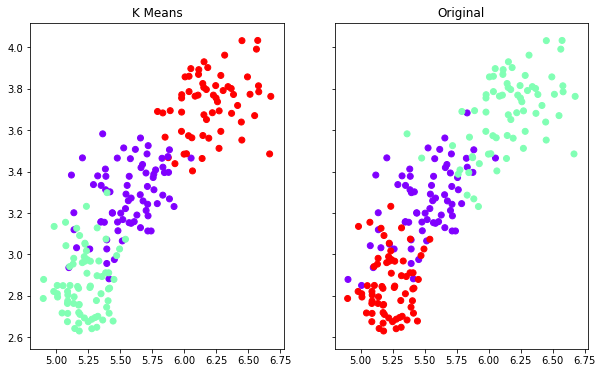

In [37]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(x=df["k_lenght"], y=df["k_width"],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(x=df["k_lenght"], y=df["k_width"], c=df["type_of_wheat"],cmap='rainbow')

### Gaussian Mixture models

In [40]:
# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=7, covariance_type='full').fit(df)
plot_results(df, gmm.predict(df), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

NameError: name 'plot_results' is not defined